In [1]:
import pandas as pd
import numpy as np

In [2]:
train_data = pd.read_csv('Google_Stock_Price_Train.csv')
train_data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [3]:
X = train_data.iloc[:, 1:2].values
from sklearn.preprocessing import MinMaxScaler
sca = MinMaxScaler(feature_range=(0, 1))
X_scaled = sca.fit_transform(X)   

In [4]:
X_train = []
y_train = []
for i in range(60, len(X_scaled)):
    X_train.append(X_scaled[i-60:i, 0])
    y_train.append(X_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [5]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

model = Sequential()
model.add(LSTM(units=50, return_sequences= True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences= True))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units= 1))
model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [14]:
#model.fit(x=X_train, y=y_train, epochs= 100, batch_size= 32)
#model.save('model.h5')

from keras.models import load_model
classifier = load_model('model.h5')

In [12]:
test_data = pd.read_csv('Google_Stock_Price_Test.csv')
y_true = test_data.iloc[:, 1:2].values
data_cat = pd.concat((train_data['Open'], test_data['Open']), axis=0)
inputs = data_cat[len(data_cat) - len(test_data) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sca.transform(inputs)

In [15]:
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [17]:
y_pred = classifier.predict(X_test)
y_pred = sca.inverse_transform(y_pred)

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

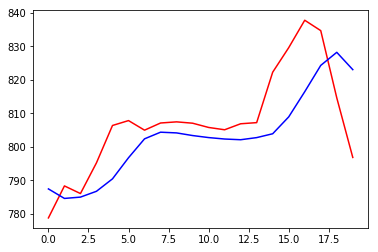

In [21]:
plt.plot(y_true, color='red')
plt.plot(y_pred, color='blue')